## 올리브영 가격 & 리뷰수 분석

In [1]:
# 라이브러리 불러오기
from selenium import webdriver # 브라우저 자동화를 위한 모듈
import requests # HTTP 요청을 보내기 위한 모듈
from bs4 import BeautifulSoup as bs # HTML 내용 파싱을 위한 모듈
import pandas as pd # 데이터 조작 및 분석을 모듈
import time # 코드 실행 속도 조절을 위한 모듈
import re # 정규 표현식 사용을 위한 모듈
import pickle # 파이썬 객체 직렬화를 위한 모듈
from selenium.webdriver.common.by import By # 다양한 방법으로 엘리먼트를 찾기 위한 모듈
import datetime # 날짜와 시간 연산을 위한 모듈

C:\Users\lnyln\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\lnyln\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [ ]:
url_df = pd.read_csv('oliveyoung_all_link.csv')
urls =url_df['link'].tolist()

In [3]:
# 크롬 드라이버 로드
driver = webdriver.Chrome()

# 각 리스트 초기화
title = []  # 제품 이름 리스트
price = [] # 제품 가격 리스트
star = [] # 총 별점 리스트 
review_cnt = [] # 리뷰 총 개수 리스트


for url in urls:
    # 웹 페이지 열기
    driver.get(url)

    # 페이지가 완전히 로드될 때까지 대기
    time.sleep(2)  # 2초 대기. 필요한 경우 조정

    # 페이지 소스를 가져와서 BeautifulSoup으로 파싱
    soup = bs(driver.page_source, 'html.parser')

    # 제목
    try:
        a = soup.find('p', class_='prd_name').get_text(strip=True)
    except:
        a = 'null'
    title.append(a)
    
    # 가격
    try:
        b = soup.find('span', class_='price-2').get_text(strip=True)
    except:
        b = 'null'
    price.append(b)
    
    # 리뷰 총 개수
    try:
        c = soup.find('em').get_text(strip=True)
    except:
        c = 'null'
    review_cnt.append(c)
    

# 드라이버 종료
driver.quit()

# 크롤링한 데이터를 데이터프레임으로 변환
raw_data = pd.DataFrame({
    'title' : title,
    'price' : price,
    'review_cnt' : review_cnt
})

# 결과 출력
print(raw_data)

                                                 title      price review_cnt
0    에스트라 아토베리어365 크림 80ml 기획 (+하이드로에센스 25ml+리제덤세럼 ...    29,700원   (5,467건)
1      라로슈포제 시카플라스트 크림 B5 100ml 기획 (시카토너50ml+시카밤3ml*2)  39,200원 ~   (1,590건)
2                [쿨링진정] 아비브 어성초 크림 카밍 튜브 75ml 1+1 한정기획    26,200원     (939건)
3        [2세대 천만크림] 닥터지 레드 블레미쉬 클리어 수딩 크림 70ml+30ml 세트  28,800원 ~  (21,356건)
4           라로슈포제 시카플라스트 밤B5+ 100ml 기획 (+시카크림 15ml 증정)  31,200원 ~   (3,400건)
..                                                 ...        ...        ...
616      수려한 비책 진생 크림 기획 (크림 30ml + 수액 25ml + 유액 25ml)    36,000원      (17건)
617                           숨37 워터풀 마린 릴리프 젤 크림 50ml    68,000원      (39건)
618                        [한정수량]닥터디퍼런트 비타리프트 에이 더블 기획    56,700원     (920건)
619                디오디너리 내추럴 모이스처라이징 팩터스 + 베타 글루칸 30ml     8,800원       (2건)
620             어바웃미 숲 진정 수분 크림 80ml (100시간 수분지속 진정크림)    30,000원     (707건)

[621 rows x 3 columns]


In [186]:
# 피클 불러오기
f = open("total.pkl", "rb")
data = pickle.load(f)
f.close()

data

# 인덱스 생성되지 않게 csv로 저장하기
data.to_csv("totaldata.csv",index = False)
data = pd.read_csv("totaldata.csv")

## 전처리

In [187]:
# 댓글 개수의 숫자화
for i in range(len(data)):

    # price에서 숫자를 제외한 모든 문자를 삭제
    data['price'][i] = re.sub("[^0-9]", "", str(data['price'][i]))
    
    # review_cnt에서 숫자를 제외한 모든 문자를 삭제
    data['review_cnt'][i] = re.sub("[^0-9]", "", str(data['review_cnt'][i]))
    
data

C:\Users\lnyln\AppData\Local\Temp/ipykernel_19036/4097940607.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['price'][i] = re.sub("[^0-9]", "", str(data['price'][i]))
C:\Users\lnyln\AppData\Local\Temp/ipykernel_19036/4097940607.py:8

,title,price,review_cnt
0,에스트라 아토베리어365 크림 80ml 기획 (+하이드로에센스 25ml+리제덤세럼 ...,29700,5467
1,라로슈포제 시카플라스트 크림 B5 100ml 기획 (시카토너50ml+시카밤3ml*2),39200,1590
2,[쿨링진정] 아비브 어성초 크림 카밍 튜브 75ml 1+1 한정기획,26200,939
3,[2세대 천만크림] 닥터지 레드 블레미쉬 클리어 수딩 크림 70ml+30ml 세트,28800,21356
4,라로슈포제 시카플라스트 밤B5+ 100ml 기획 (+시카크림 15ml 증정),31200,3400
...,...,...,...
616,수려한 비책 진생 크림 기획 (크림 30ml + 수액 25ml + 유액 25ml),36000,17
617,숨37 워터풀 마린 릴리프 젤 크림 50ml,68000,39
618,[한정수량]닥터디퍼런트 비타리프트 에이 더블 기획,56700,920
619,디오디너리 내추럴 모이스처라이징 팩터스 + 베타 글루칸 30ml,8800,2


In [188]:
# 데이터를 데이터프레임으로 변환
df= pd.DataFrame(data)
print(df)

# 'price' 열에서 빈 문자열을 NaN으로 변환
df['price'] = df['price'].replace('', pd.NA)
df['review_cnt'] = df['review_cnt'].replace('', pd.NA)

# NaN 값을 적절한 값으로 대체하고 정수형으로 변환
df['price'] = df['price'].fillna(0).astype(int)
df['review_cnt'] = df['review_cnt'].fillna(0).astype(int)

# CSV 파일로 저장
df.to_csv('total.csv', index=False, encoding="utf-8-sig")

total = pd.read_csv('total.csv')
total

                                                 title  price review_cnt
0    에스트라 아토베리어365 크림 80ml 기획 (+하이드로에센스 25ml+리제덤세럼 ...  29700       5467
1      라로슈포제 시카플라스트 크림 B5 100ml 기획 (시카토너50ml+시카밤3ml*2)  39200       1590
2                [쿨링진정] 아비브 어성초 크림 카밍 튜브 75ml 1+1 한정기획  26200        939
3        [2세대 천만크림] 닥터지 레드 블레미쉬 클리어 수딩 크림 70ml+30ml 세트  28800      21356
4           라로슈포제 시카플라스트 밤B5+ 100ml 기획 (+시카크림 15ml 증정)  31200       3400
..                                                 ...    ...        ...
616      수려한 비책 진생 크림 기획 (크림 30ml + 수액 25ml + 유액 25ml)  36000         17
617                           숨37 워터풀 마린 릴리프 젤 크림 50ml  68000         39
618                        [한정수량]닥터디퍼런트 비타리프트 에이 더블 기획  56700        920
619                디오디너리 내추럴 모이스처라이징 팩터스 + 베타 글루칸 30ml   8800          2
620             어바웃미 숲 진정 수분 크림 80ml (100시간 수분지속 진정크림)  30000        707

[621 rows x 3 columns]


,title,price,review_cnt
0,에스트라 아토베리어365 크림 80ml 기획 (+하이드로에센스 25ml+리제덤세럼 ...,29700,5467
1,라로슈포제 시카플라스트 크림 B5 100ml 기획 (시카토너50ml+시카밤3ml*2),39200,1590
2,[쿨링진정] 아비브 어성초 크림 카밍 튜브 75ml 1+1 한정기획,26200,939
3,[2세대 천만크림] 닥터지 레드 블레미쉬 클리어 수딩 크림 70ml+30ml 세트,28800,21356
4,라로슈포제 시카플라스트 밤B5+ 100ml 기획 (+시카크림 15ml 증정),31200,3400
...,...,...,...
616,수려한 비책 진생 크림 기획 (크림 30ml + 수액 25ml + 유액 25ml),36000,17
617,숨37 워터풀 마린 릴리프 젤 크림 50ml,68000,39
618,[한정수량]닥터디퍼런트 비타리프트 에이 더블 기획,56700,920
619,디오디너리 내추럴 모이스처라이징 팩터스 + 베타 글루칸 30ml,8800,2


In [30]:
# 시작 전 가져올 전처리 다 된 데이터

df = pd.read_csv('total.csv')
df

,title,price,review_cnt
0,에스트라 아토베리어365 크림 80ml 기획 (+하이드로에센스 25ml+리제덤세럼 ...,29700,5467
1,라로슈포제 시카플라스트 크림 B5 100ml 기획 (시카토너50ml+시카밤3ml*2),39200,1590
2,[쿨링진정] 아비브 어성초 크림 카밍 튜브 75ml 1+1 한정기획,26200,939
3,[2세대 천만크림] 닥터지 레드 블레미쉬 클리어 수딩 크림 70ml+30ml 세트,28800,21356
4,라로슈포제 시카플라스트 밤B5+ 100ml 기획 (+시카크림 15ml 증정),31200,3400
...,...,...,...
616,수려한 비책 진생 크림 기획 (크림 30ml + 수액 25ml + 유액 25ml),36000,17
617,숨37 워터풀 마린 릴리프 젤 크림 50ml,68000,39
618,[한정수량]닥터디퍼런트 비타리프트 에이 더블 기획,56700,920
619,디오디너리 내추럴 모이스처라이징 팩터스 + 베타 글루칸 30ml,8800,2


In [189]:
df["review_cnt"].max()
df["price"].max()

max_price = df["price"].max()
max_price_row = df[df["price"] == max_price]
print(max_price_row)

                         title   price  review_cnt
244  컴포트존 서브라임 스킨 플루이드 크림 60ml  159000           0
491       컴포트존 서브라임 스킨 크림 60ml  159000           0


In [190]:
# 데이터 타입 확인 -> 실수형으로 소수점 나오는 문제 발생
df.dtypes

title         object
price          int32
review_cnt     int32
dtype: object

In [38]:
# 리뷰수가 2000개 이상인 데이터
df_filtered = df[df["review_cnt"] >= 2000]
print(df_filtered.max())

# 리뷰 수가 가장 많은 행 찾기
max_row = df[df["review_cnt"] == df["review_cnt"].max()]
print(max_row)

title         한율 어린쑥 수분진정 크림 110ml 대용량 기획 (+25ml+ 패드2매+흡착팩폼2ml)
price                                                     78000
review_cnt                                                42061
dtype: object
                                                 title  price  review_cnt
478  에스트라 아토베리어365 크림 80ml 기획 (+하이드로에센스 25ml+무기자차선크...  31000       42061


In [31]:
# 진짜 데이터
real_data = df[(df.price <= 78000) & (df.price >= 10000)].reset_index(drop=True)

real_data

,title,price,review_cnt
0,에스트라 아토베리어365 크림 80ml 기획 (+하이드로에센스 25ml+리제덤세럼 ...,29700,5467
1,라로슈포제 시카플라스트 크림 B5 100ml 기획 (시카토너50ml+시카밤3ml*2),39200,1590
2,[쿨링진정] 아비브 어성초 크림 카밍 튜브 75ml 1+1 한정기획,26200,939
3,[2세대 천만크림] 닥터지 레드 블레미쉬 클리어 수딩 크림 70ml+30ml 세트,28800,21356
4,라로슈포제 시카플라스트 밤B5+ 100ml 기획 (+시카크림 15ml 증정),31200,3400
...,...,...,...
590,[가벼운 여름용] 피지오겔 DMT 하이드로 젤 수분크림 70ml+30ml 기획,23500,634
591,수려한 비책 진생 크림 기획 (크림 30ml + 수액 25ml + 유액 25ml),36000,17
592,숨37 워터풀 마린 릴리프 젤 크림 50ml,68000,39
593,[한정수량]닥터디퍼런트 비타리프트 에이 더블 기획,56700,920


## 가격과 상품 개수 바그래프

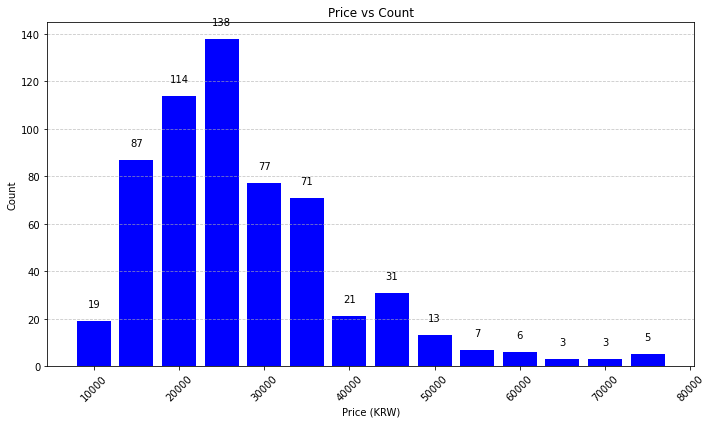

In [7]:
import matplotlib.pyplot as plt

# 가격을 5000원 단위로 나누어 가격 범위 생성
price_ranges = range((real_data['price'].min() // 5000) * 5000, ((real_data['price'].max() + 5000) // 5000) * 5000, 5000)

# 각 가격 범위에 대한 제품 개수 계산
review_counts = []
for price_range in price_ranges:
    filtered_data = real_data[(real_data['price'] >= price_range) & (real_data['price'] < price_range + 5000)]
    review_counts.append(filtered_data['review_cnt'].count())

# 바 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(price_ranges, review_counts, color='blue', width=4000)  # 가격 범위 별로 바 그래프 그리기
plt.title('Price vs Count')
plt.xlabel('Price (KRW)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 바 위에 값을 표시
for bar, num in zip(bars, review_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 5, str(num), 
             ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


## 가격과 리뷰 개수 바 그래프
### 5000원 단위씩

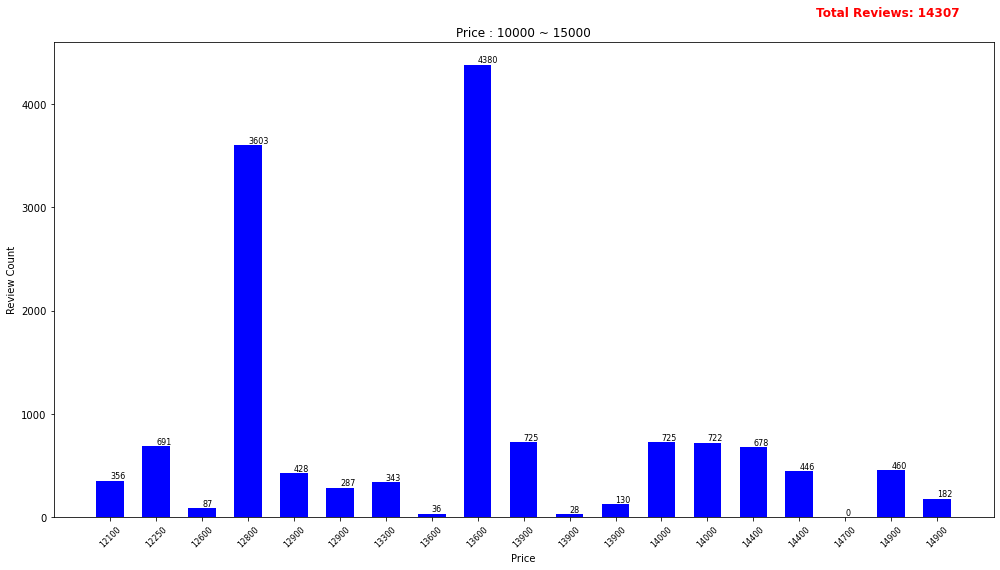

<Figure size 432x288 with 0 Axes>

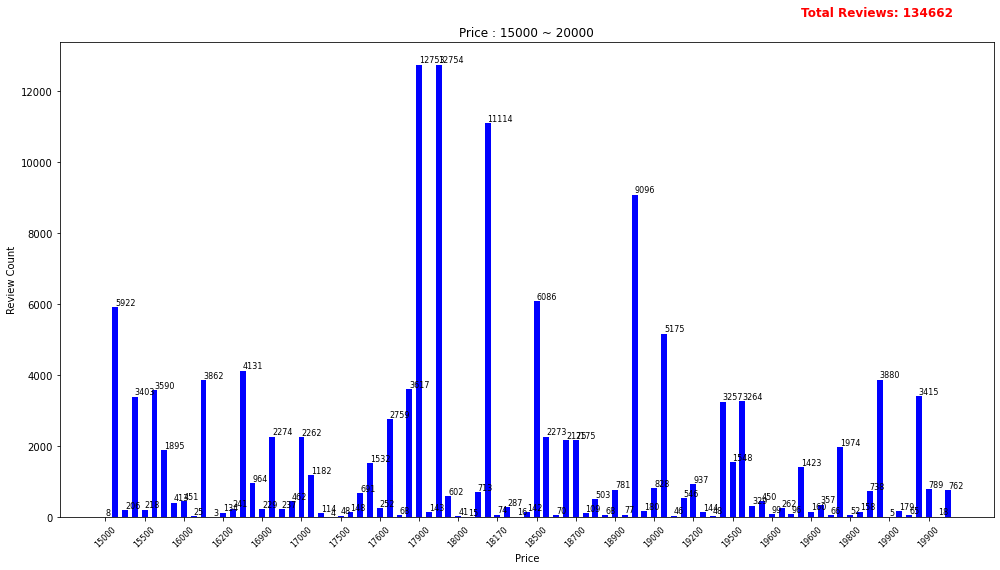

<Figure size 432x288 with 0 Axes>

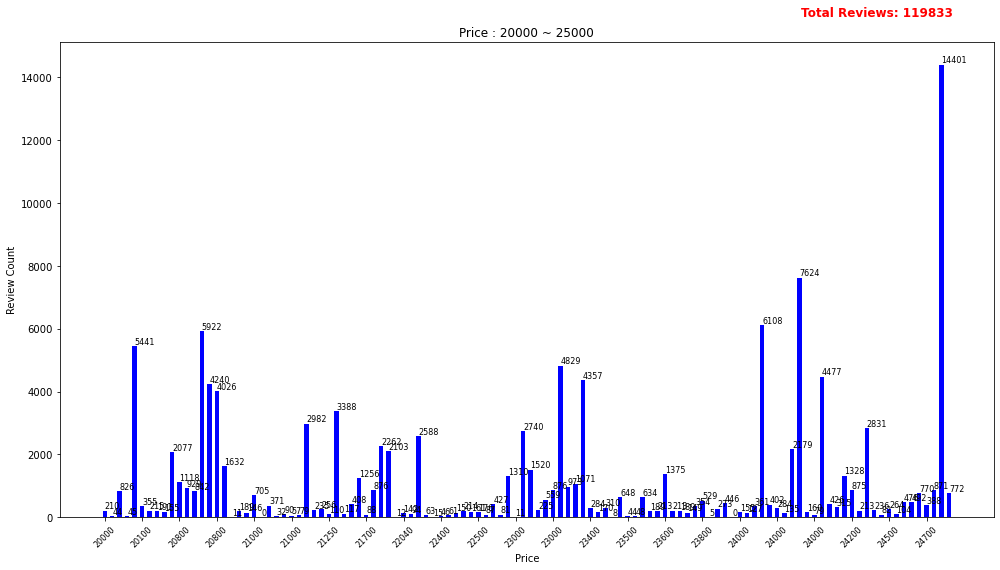

<Figure size 432x288 with 0 Axes>

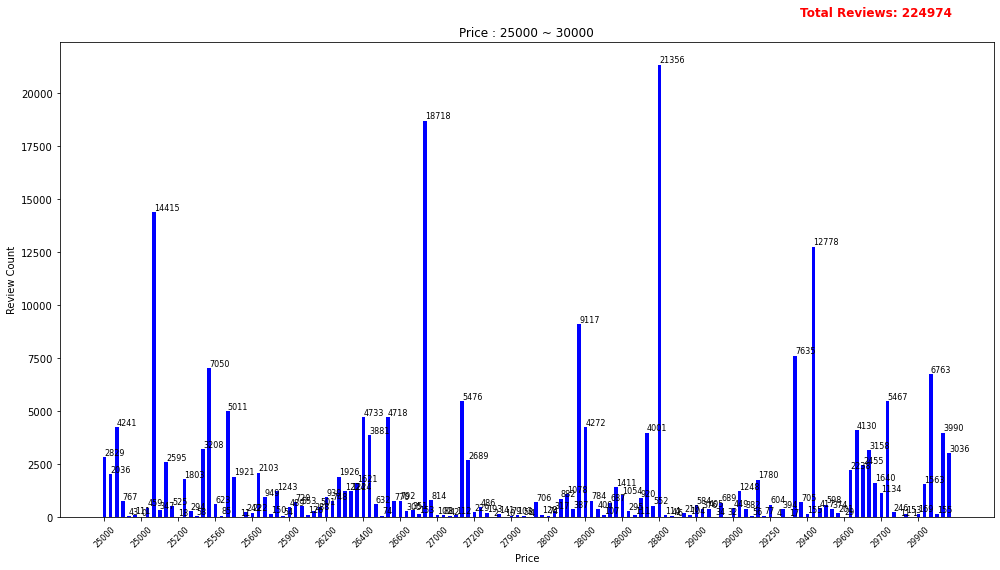

<Figure size 432x288 with 0 Axes>

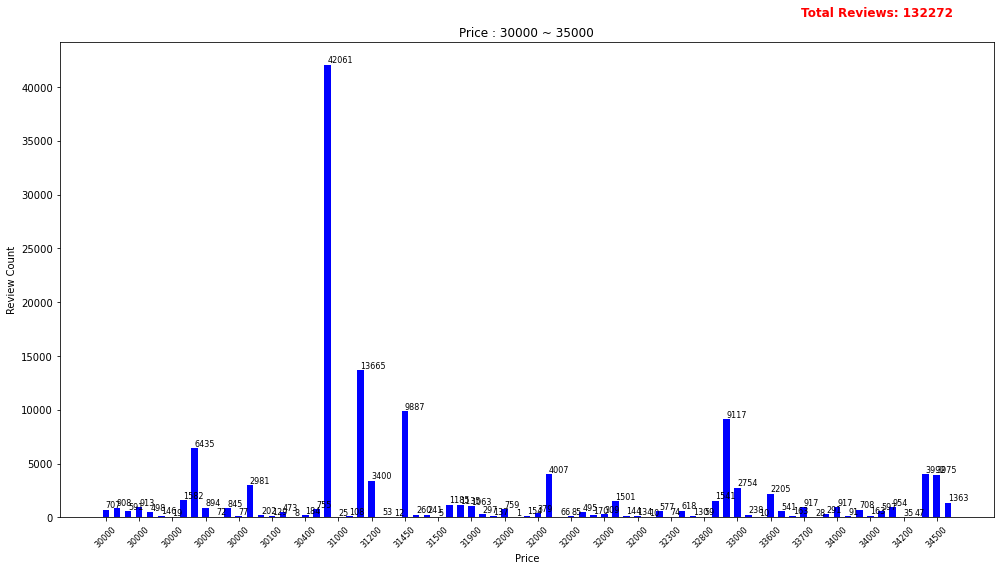

<Figure size 432x288 with 0 Axes>

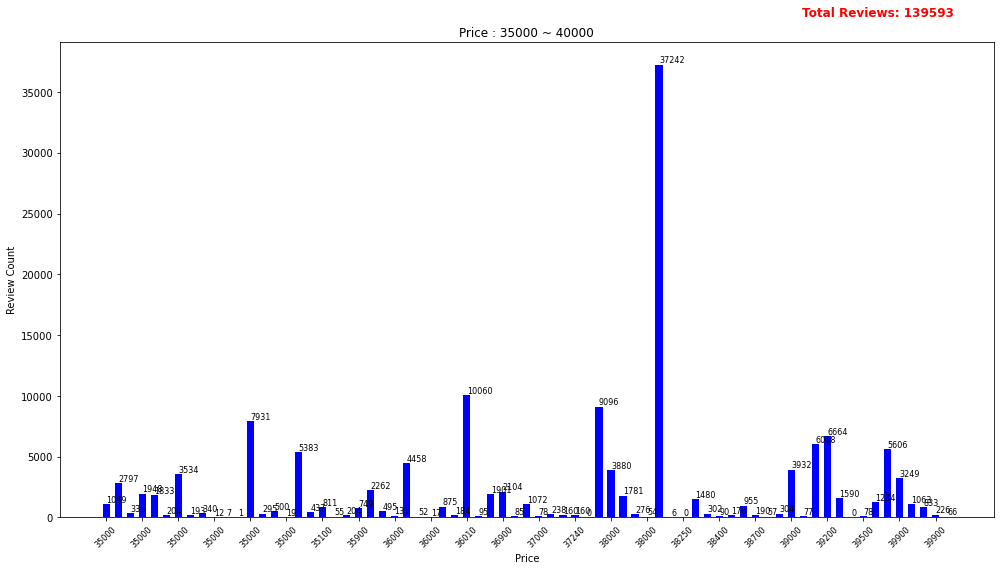

<Figure size 432x288 with 0 Axes>

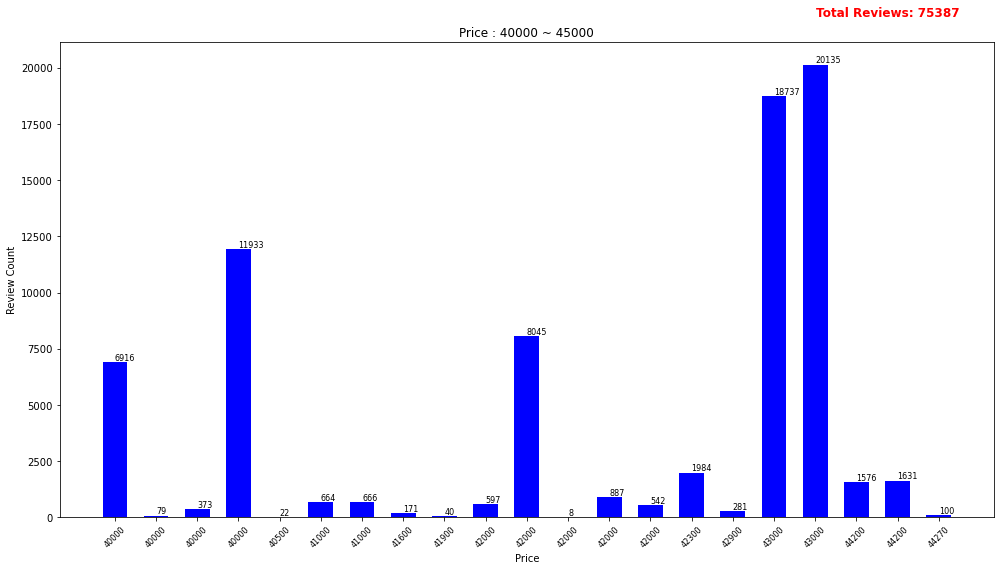

<Figure size 432x288 with 0 Axes>

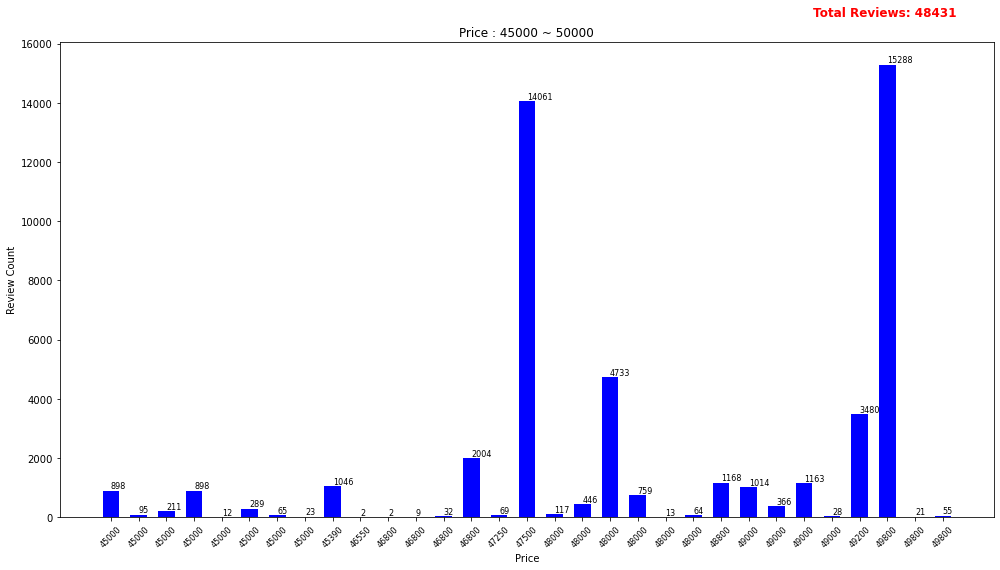

<Figure size 432x288 with 0 Axes>

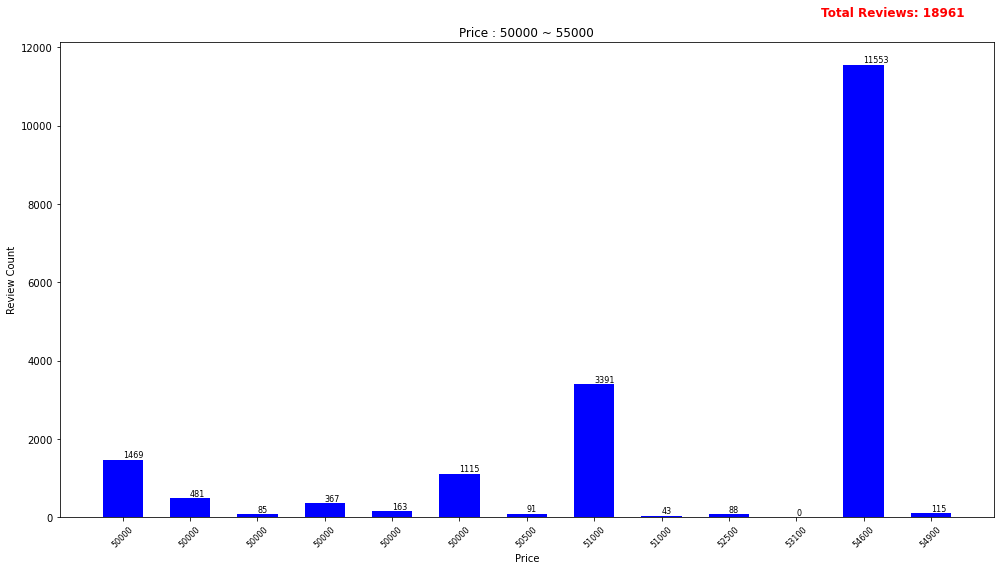

<Figure size 432x288 with 0 Axes>

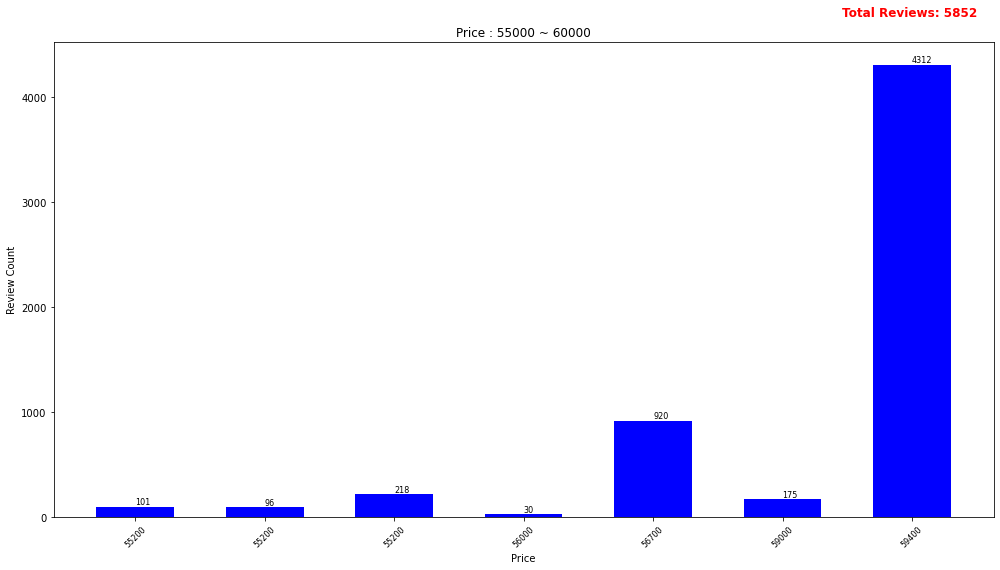

<Figure size 432x288 with 0 Axes>

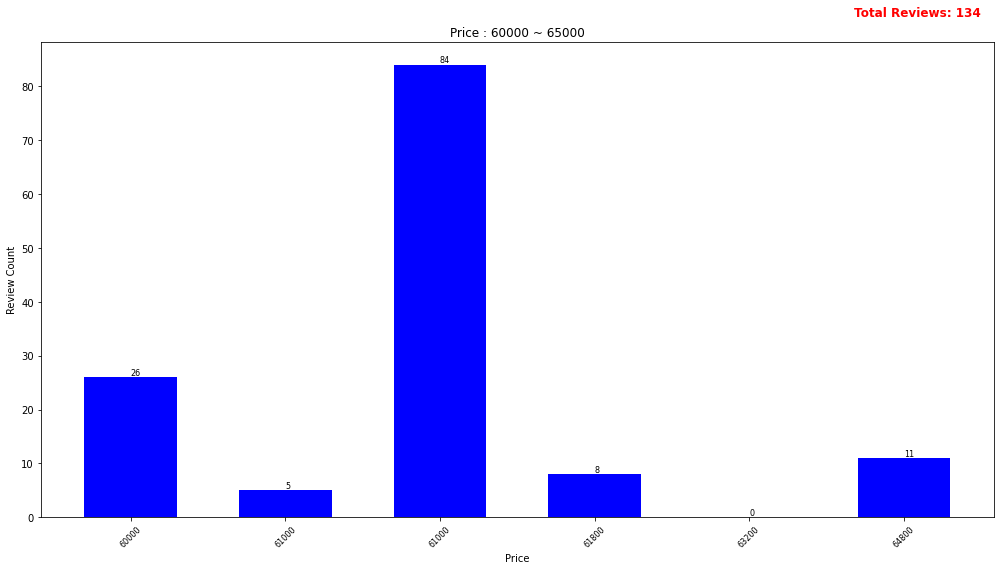

<Figure size 432x288 with 0 Axes>

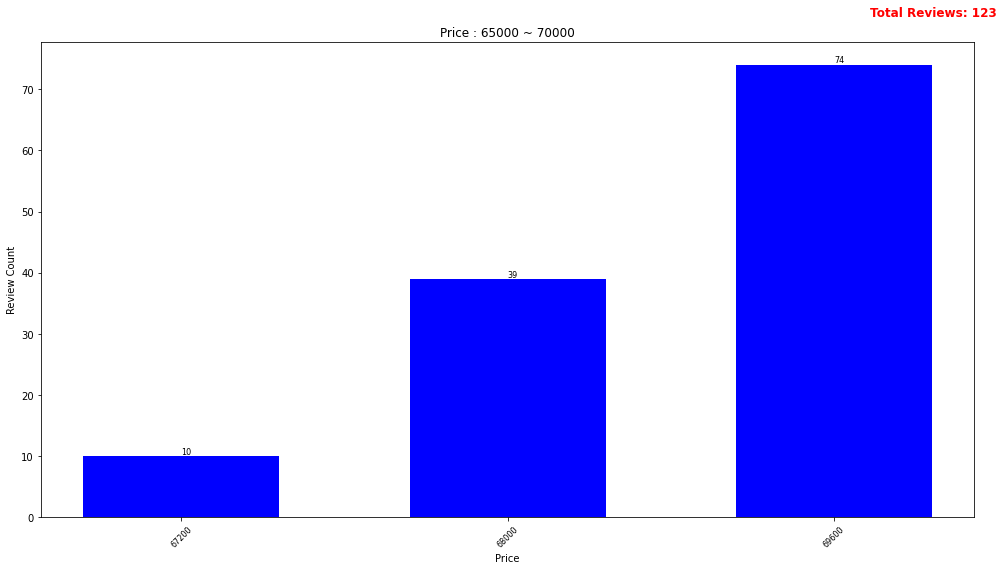

<Figure size 432x288 with 0 Axes>

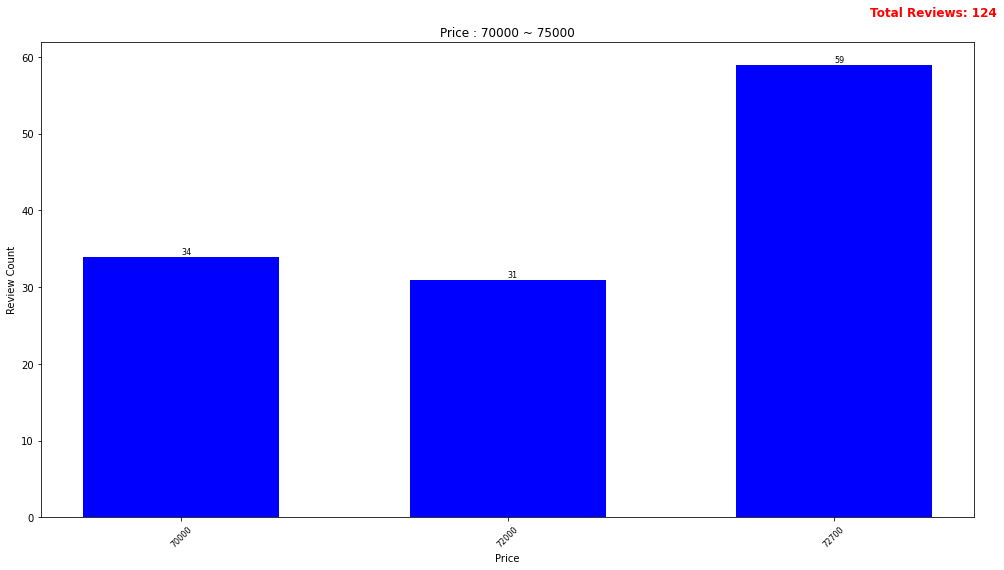

<Figure size 432x288 with 0 Axes>

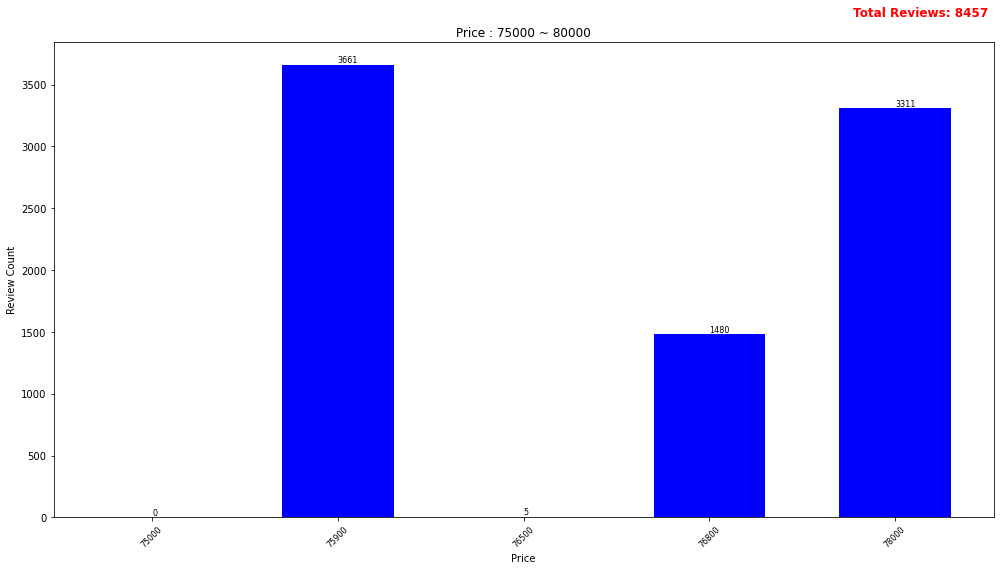

<Figure size 432x288 with 0 Axes>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 5000원 단위 범위 설정
price_ranges = [(10000, 15000), (15000, 20000), (20000, 25000), (25000, 30000),
                (30000, 35000), (35000, 40000), (40000, 45000), (45000, 50000),
                (50000, 55000), (55000, 60000), (60000, 65000), (65000, 70000),
                (70000, 75000), (75000, 80000)]

# 각 범위에 대한 그래프 생성
for start_price, end_price in price_ranges:
    # 데이터 필터링 및 정렬
    data = real_data[(real_data.price < end_price) & (real_data.price >= start_price)].reset_index(drop=True)
    data = data.sort_values(by='price').reset_index(drop=True)
    
    # review_cnt_total 계산
    review_cnt_total = data['review_cnt'].sum()
    
    # review_cnt_total을 새로운 열에 추가
    data['review_cnt_total'] = review_cnt_total
    
    # 바 그래프 그리기
    plt.figure(figsize=(14, 8))  # 그래프 크기 조정
    bars = plt.bar(range(len(data)), data["review_cnt"], color='blue', width=0.6)  # 바의 너비 조정
    
    # 바 그래프 위에 값 작성
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', fontsize=8)
    
    # 리뷰 총 개수를 바 그래프에 추가
    plt.text(len(data) - 0.5, max(data["review_cnt"]) + (max(data["review_cnt"]) * 0.1), 
             f'Total Reviews: {review_cnt_total}', ha='right', va='bottom', color='red', fontsize=12, fontweight='bold')
    
    plt.title(f'Price : {start_price} ~ {end_price}')
    plt.xlabel('Price')
    plt.ylabel('Review Count')
    
    # x축 레이블 간격 조정
    plt.xticks(range(0, len(data), max(1, len(data) // 20)), data["price"].iloc[::max(1, len(data) // 20)], rotation=45, fontsize=8)
    
    plt.tight_layout()
    plt.show()



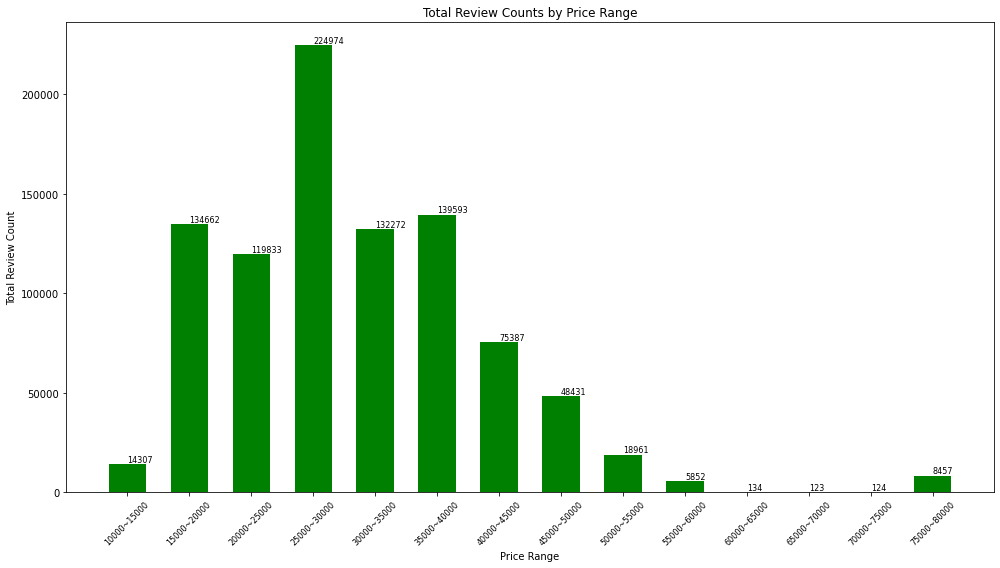

In [47]:
# 총리뷰 개수와 5000원단위의 상품의 그래프

# 5000원 단위 범위 설정
price_ranges = [(10000, 15000), (15000, 20000), (20000, 25000), (25000, 30000),
                (30000, 35000), (35000, 40000), (40000, 45000), (45000, 50000),
                (50000, 55000), (55000, 60000), (60000, 65000), (65000, 70000),
                (70000, 75000), (75000, 80000)]

# 각 가격 범위에 대한 review_cnt_total 계산
review_cnt_totals = []
price_range_labels = []

for start_price, end_price in price_ranges:
    # 데이터 필터링
    data = real_data[(real_data.price < end_price) & (real_data.price >= start_price)]
    
    # review_cnt_total 계산
    review_cnt_total = data['review_cnt'].sum()
    review_cnt_totals.append(review_cnt_total)
    price_range_labels.append(f'{start_price}~{end_price}')

# 바 그래프 그리기
plt.figure(figsize=(14, 8))
bars = plt.bar(price_range_labels, review_cnt_totals, color='green', width=0.6)

# 바 그래프 위에 값 작성
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', fontsize=8)

plt.title('Total Review Counts by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Total Review Count')

plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()